In [33]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


## Import the Fashion MNIST dataset

In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Xem thong tin dataset
Co 60,000 anh trong dataset, moi anh la 1 ma tran 28 x 28 pixels:

In [36]:
train_images.shape

(60000, 28, 28)

Co 60000 labels, moi label nhan gia tri tu 0 - 9

In [37]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Xem thong tin test dataset
Co 10,000 anh trong dataset, moi anh la 1 ma tran 28 x 28 pixels:

In [38]:
test_images.shape

(10000, 28, 28)

## Tien xu ly

Moi pixel trong anh co gia tri tu 0 den 255:

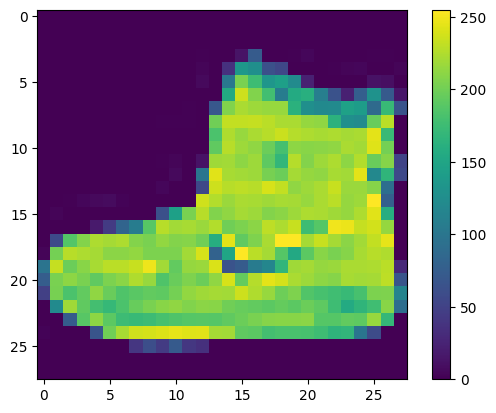

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Chuan hoa pixel ve khoang tu 0 den 1 truoc khi dua vao model bang cach chia cac gia tri cho 255.

In [40]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Show 25 images dau tien de kiem tra cac nhan

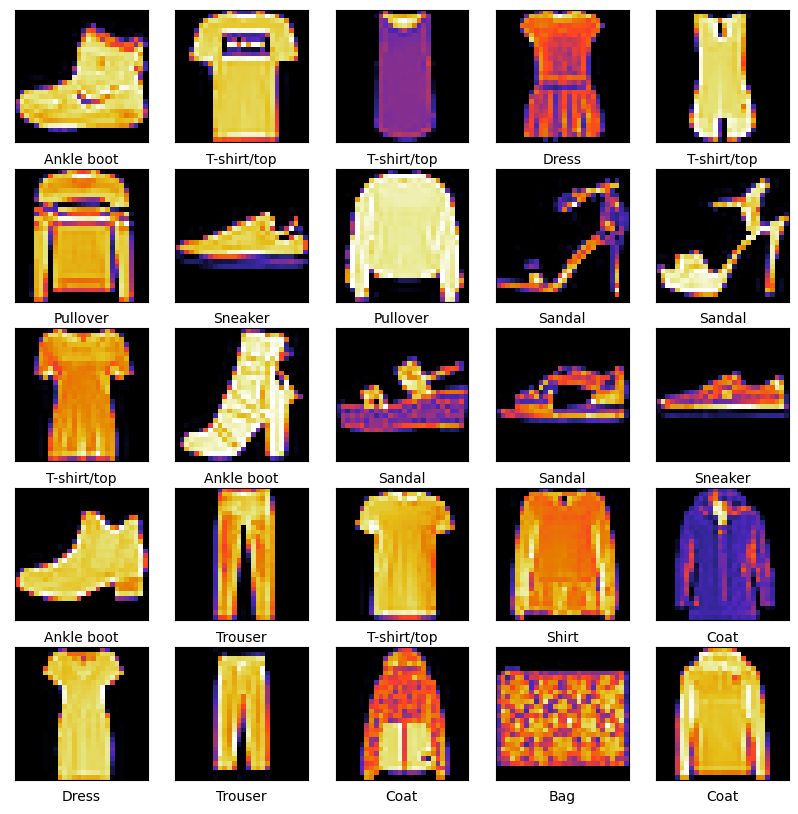

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.CMRmap)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Xay dung mo hinh 

Xay dung mang noron can cai dat cac layer.

### Cai dat cac layer

Layer la yeu to co ban nhat de xay dung cac mang no ron

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Layer dau tien, `tf.keras.layers.Flatten` se bien doi cac images tu 2d(28*28) sang 1d(784), layer nay ko co nhiem vu hoc, chi format lai data
2 layer tiep theo la 2 layer Dense duoc ket noi chat che voi nhau. Layer dau tien co 128 node, layer cuoi cung tra ve 1 array gom 10 diem so duoc cham tuong ung voi 10 class

### Compile mo hinh
Truoc khi train thi can p cai dat cho model them ham *Loss*, *Optimzer*, *Metrics*
* *Loss function* : Dung de danh gia do chinh xac cua model trong qua trinh training. Tra ve gia tri cang nho cang tot
* *Optimizer* : Dung de cap nhat model dua tren du lieu model thay va ham Loss
* *Metrics* : Dung de theo doi qua trinh train va test. O day su dung accuracy de in ra ti le cac anh duoc du doan chinh xac

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train mo hinh

Cac buoc:

1. Do du lieu train vao model. (`train_images`, `train_labels` )
2. Model hoc cach lien ket hinh anh(image) va nhan(label).
3. Cho model du doan bo du lieu test  (`test_images`)
4. Kiem tra xem cac du doan co khop `test_labels` hay khong.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [44]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2023-01-05 18:44:24.062531: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4992 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3749 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3342 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3109 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2928 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2793 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2635 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2527 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2448 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2359 - accurac

### Tinh toan do chinh xac

Xem xet kha nang du doan cua model voi bo du lieu test 

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2023-01-05 18:45:47.711824: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.3430 - accuracy: 0.8797 - 842ms/epoch - 3ms/step

Test accuracy: 0.8797000050544739


Do chinh xac train test dataset thap hon train dataset. Dieu nay the hien model dang bi overfitting. Overfitting la khi model dang du doan khong tot tren bo du lieu moi(chua tung xuat hien trong qua trinh train). Mot model bi overfitting se ghi nho nhieu va cac chi tiet trong bo du lieu train khien cho performance bi anh huong khi du doan bo du lieu moi

### Du doan

Dung model da duoc train de du doan hinh anh
Them softmax layer de chuyen du lieu dau ra chua duoc chuan hoa cua model thanh cac xac suat

In [46]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Model du doan xong tra ve array xac suat cua moi image
Chon ket qua du doan cua image dau tien

In [48]:
predictions[0]

array([4.8600771e-07, 9.3251670e-11, 3.4008735e-08, 9.7819139e-09,
       3.5957196e-08, 6.5619145e-03, 6.1540214e-07, 5.4783795e-02,
       1.8784078e-06, 9.3865114e-01], dtype=float32)

Ket qua du doan la 1 array voi 10 so the hien do chac chan cua model voi 10 nhan. In ra nhan ma co xac suat cao nhat

In [49]:
np.argmax(predictions[0])

9

Kiem tra array nhan thi ket qua model du doan la dung

In [50]:
test_labels[0]

9

Tao bieu do de xem cac du doan cua 10 nhan

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

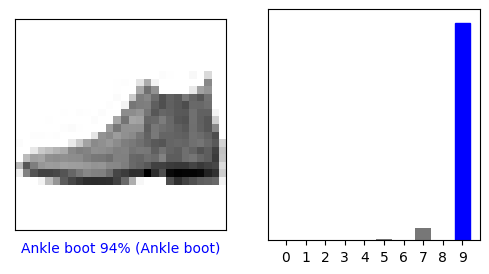

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

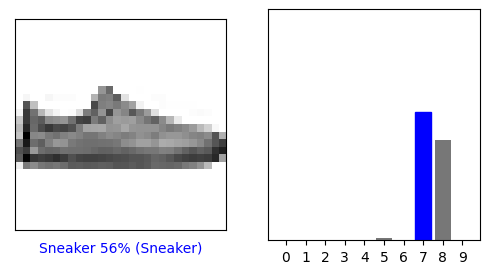

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

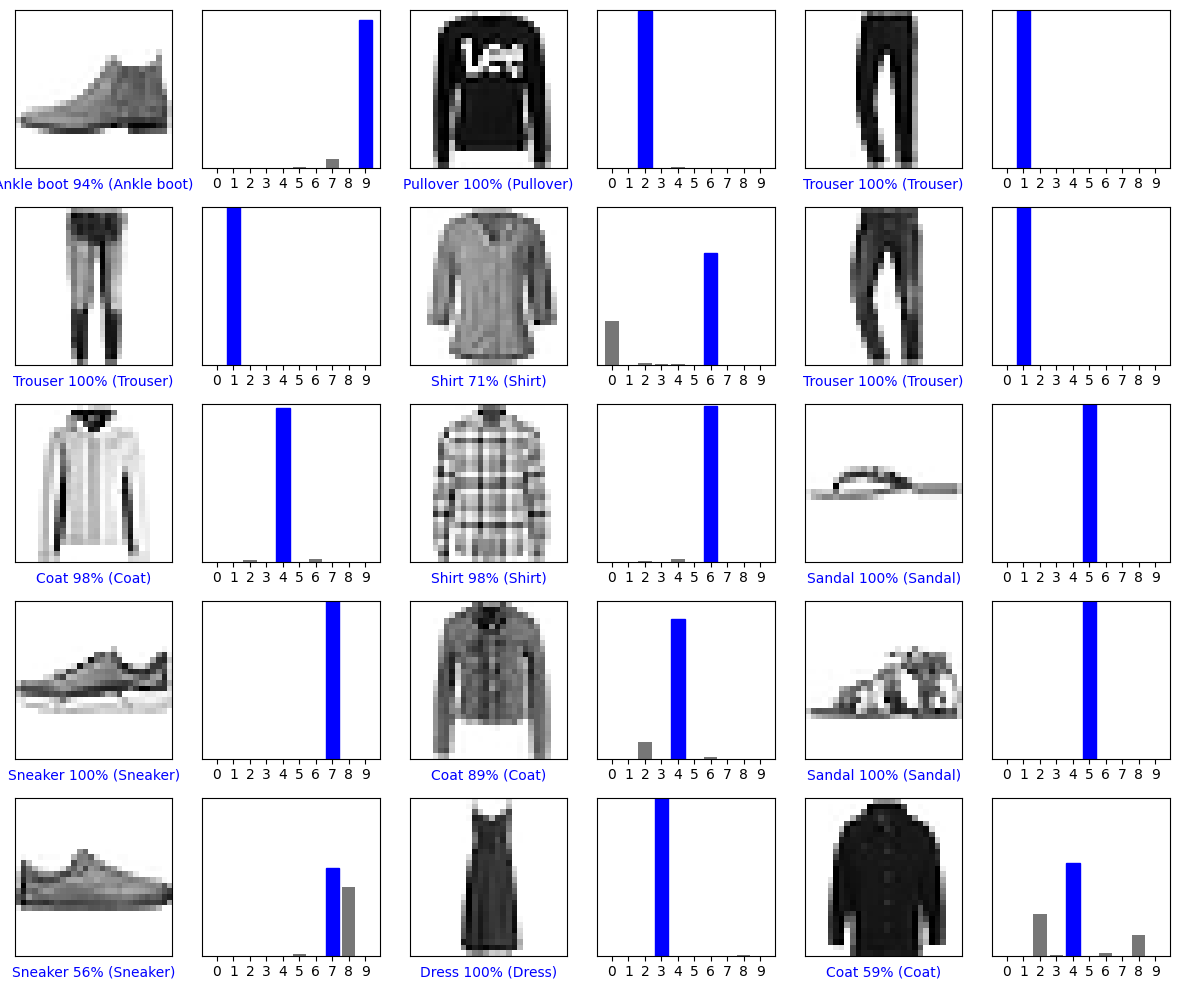

In [54]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Su dung model duoc train de du doan hinh anh

In [55]:
img = test_images[1]

print(img.shape)

(28, 28)


Do cac model cua `Keras` duoc toi uu de du doan theo list nen phai them anh duoc chon vao 1 array. Do anh la mang 2d nen phai dua vao 1 mang 3d de luu tru

In [56]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Tien hanh du doan anh sau khi them anh vao 1 list:

In [57]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 42ms/step
[[1.01250014e-04 5.18875409e-14 9.95451033e-01 1.75196554e-12
  4.33716038e-03 1.39090484e-09 1.10577545e-04 6.82565509e-14
  2.64381672e-09 4.69201663e-13]]


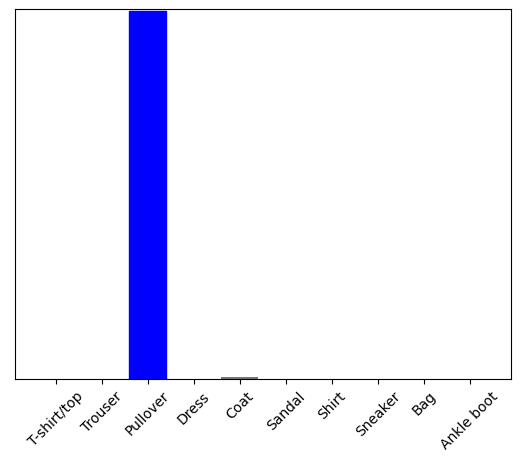

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()